1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

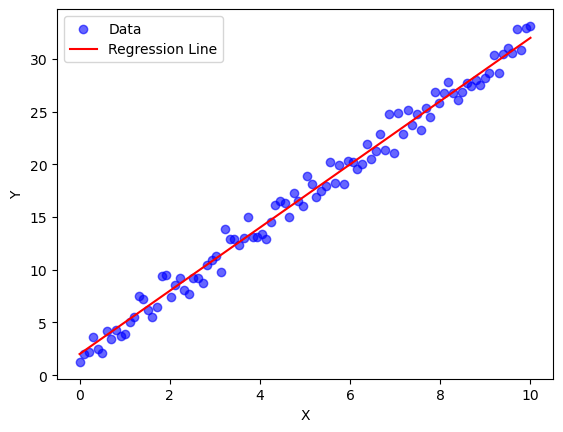

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the SLR model
beta_0, beta_1, sigma = 2, 3, 1

# Generate X and Y based on the model
X = np.linspace(0, 10, 100)
Y = beta_0 + beta_1 * X + np.random.normal(0, sigma, size=X.shape)

# Plot data and true regression line
plt.scatter(X, Y, color='blue', alpha=0.6, label='Data')
plt.plot(X, beta_0 + beta_1 * X, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Simple Linear Regression tries to draw a straight line that best fits the relationship between two variables:

Predictor (X): This is the input, like study hours.
Outcome (Y): This is the result we're predicting, like test scores.
Intercept (Beta0): This is the starting point of our line, the predicted score when study hours are zero.
Slope (Beta1): This shows how much the outcome changes for each increase in the predictor. For example, every extra hour of studying might increase the score by a certain amount.
Error (epsilon): Real-life data isn’t perfect, so we add random “noise” to account for the variation we can’t predict with our line alone.

In the code, we created a set of data points based on this idea, with some random noise added. The scatter plot shows these data points along with the “best-fit” line. This line represents the model’s prediction of how Y changes with X.

2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

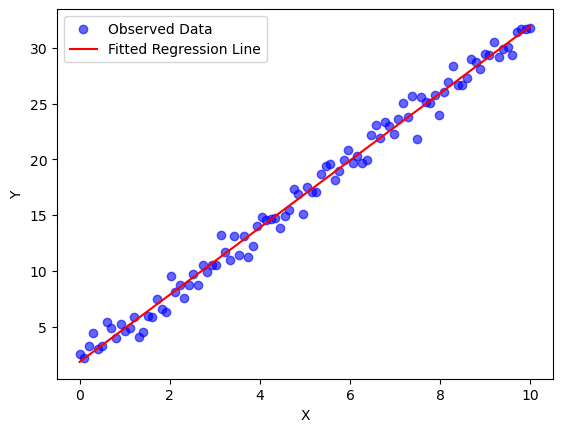

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9286.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           6.75e-99
Time:                        04:53:38   Log-Likelihood:                -131.66
No. Observations:                 100   AIC:                             267.3
Df Residuals:                      98   BIC:                             272.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8272      0.181     10.094      0.000       1.468       2.186
X              3.0138      0.031     96.366      0.000       2.952       3.076
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.518
Skew:                          -0.167   Prob(JB):                        0.772
Kurtosis:                       2.885   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
import pandas as pd
import statsmodels.formula.api as smf

# Set up the theoretical Simple Linear Regression model parameters
np.random.seed(42)
beta_0, beta_1, sigma = 2, 3, 1

# Generate a dataset
X = np.linspace(0, 10, 100)
Y = beta_0 + beta_1 * X + np.random.normal(0, sigma, size=X.shape)

# Create a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()

# Plot observed data and fitted regression line
plt.scatter(data['X'], data['Y'], color='blue', alpha=0.6, label='Observed Data')
plt.plot(data['X'], model.fittedvalues, color='red', label='Fitted Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Display model summary
model.summary()


3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

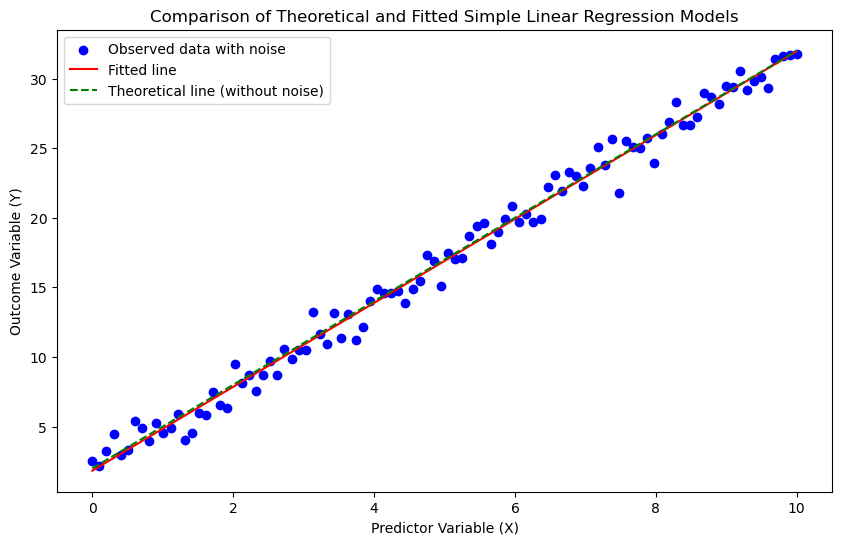

In [5]:
# Plot the observed data, fitted regression line, and theoretical line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', label='Observed data with noise')

# Add the fitted line from the statsmodels regression
plt.plot(data['X'], model.fittedvalues, color='red', label='Fitted line')

# Add the theoretical line without noise
plt.plot(data['X'], beta_0 + beta_1 * data['X'], color='green', linestyle='--', label='Theoretical line (without noise)')

# Add labels and title
plt.xlabel("Predictor Variable (X)")
plt.ylabel("Outcome Variable (Y)")
plt.title("Comparison of Theoretical and Fitted Simple Linear Regression Models")
plt.legend()
plt.show()


True Regression Line (dashed green): This line represents the exact theoretical relationship we set when simulating the data. It is based on the true intercept (beta0 = 2) and slope (beta1 = 3) values we defined for the model.

Fitted Regression Line (solid red): This line represents the best estimate of the relationship between X and Y based on the observed data sample. It’s calculated by the regression model using the sample points, which include random noise.

Explanation of Differences:
The difference between the two lines is due to random sampling variation. The fitted line is close to, but not exactly the same as, the true line because of the random variation introduced in the data by the error term. Each new sample would slightly shift the fitted line because of this inherent noise in real-world data.

4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

The estimated Simple Linear Regression model’s "in-sample predictions" use observed data to approximate the relationship between X and Y. This is done by calculating predicted values as y_hat_i = beta_hat_0 + beta_hat_1 * x_i, where beta_hat_0 and beta_hat_1 are estimates based on minimizing the residuals in the sample.

In contrast, the theoretical model Y_i = beta_0 + beta_1 * x_i + epsilon_i defines the true underlying relationship, with beta_0 and beta_1 as fixed, unknown constants and epsilon_i as random noise. While the fitted model’s predictions approximate this line, they differ slightly due to sampling variation, making the fitted parameters close to but not identical to the true parameters.

summary: Simple Linear Regression Model: We started by defining the theoretical Simple Linear Regression model, which consists of:

Predictor Variable (X) and Outcome Variable (Y).
Intercept (beta0) and Slope (beta1), which describe the ideal linear relationship between X and Y.
Error Term (epsilon), representing random noise around the line, assumed to follow a normal distribution.
Simulation and Visualization: We used Python code to generate a dataset from the theoretical model, with random noise added, and then fitted a Simple Linear Regression model to this data using statsmodels. This provided fitted values based on sample data.

Comparison of Theoretical and Fitted Lines:

The theoretical line represents the exact relationship without noise, while the fitted line is an estimate derived from the specific sample, influenced by sampling variation. Each sample will yield slightly different fitted lines due to random noise.
In-Sample Predictions vs. Theoretical Model Predictions:

In-sample predictions from the fitted model use estimated intercept (beta0) and slope (beta1), making them close but not identical to predictions from the theoretical model. Theoretical predictions assume perfect knowledge of beta0 and beta1 , without the impact of sampling variation.
 
link1-4 https://chatgpt.com/share/6729a830-9258-800d-b232-23ed833a4aa9

5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares

The fitted line in the Ordinary Least Squares (OLS) method is chosen by finding the line that minimizes the total squared differences (residuals) between observed data points and the predicted values on the line. This means OLS seeks the line where the sum of squared residuals—each observed point's distance from the line squared—is as small as possible.

Using squares is essential because it ensures all residuals are positive (since distances can be negative or positive otherwise) and heavily penalizes larger errors, leading to a single best-fitting line that balances all data points.

6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.

All four expressions aim to quantify how well the linear model explains the variation in Y.
The first two expressions compute R-squared directly.
The third and fourth expressions use squared correlations to capture R-squared, representing the strength of the linear relationship between Y and either the predictions or X.

7. Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

Linearity: Simple Linear Regression assumes a linear relationship between the predictor (fertilizer amount) and the outcome (crop yield). However, the scatter plot likely shows a nonlinear trend, where crop yield initially increases more slowly, then more rapidly, and finally perhaps levels off. This nonlinearity suggests that a linear model might not accurately capture the relationship.

Normally Distributed Residuals: The residuals histogram shows whether the residuals (differences between observed and predicted values) follow a normal distribution. If the residuals appear skewed or have extreme values (indicating non-normality), this assumption is violated. Given the data pattern, it’s likely the residuals won’t be normally distributed, which affects the reliability of statistical inferences made from this model.

summary: Simple Linear Regression and OLS: We discussed how Ordinary Least Squares (OLS) chooses the line that minimizes the sum of squared residuals to best fit observed data, explaining why it squares residuals to avoid cancellation of positive and negative values and to emphasize larger deviations.

Proportion of Variation Explained: I explained how different expressions in linear regression (e.g., R^2) show the proportion of variation in the outcome explained by the model. Each expression you shared (e.g., 1 - (SSE/SST), fitted_model.rsquared, np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2) measures R^2, quantifying the model's accuracy in explaining variability in Y.

Incompatibility with Simple Linear Regression Assumptions: You shared code and data on crop yield and fertilizer amount. We noted that the data might violate assumptions of linearity and homoscedasticity in simple linear regression, as the relationship between fertilizer and yield appears non-linear, and residuals may vary inconsistently across the range. This suggests that a linear model may not be ideal for the data, indicating a potential need for more advanced modeling techniques.

link 5-7: https://chatgpt.com/share/6729ab5b-c888-800d-bec3-b5bc9c0e8544

8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset

There is no linear association between the waiting time and eruption duration in the Old Faithful Geyser dataset

9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

Short Wait Limit 62: The coefficient is -0.3122 with a high p-value (0.742), indicating no significant evidence of a linear relationship.
Short Wait Limit 64: The coefficient is -0.7322, and the p-value is 0.327, which still doesn’t provide sufficient evidence against the null hypothesis.
Short Wait Limit 66: The coefficient is -1.1344 with a p-value of 0.079, which is closer to significance but still above the common threshold of 0.05.
In summary, none of the subsets show strong evidence against the null hypothesis of no linear association within the short wait times, although the relationship becomes more suggestive (lower p-value) as the wait limit increases to 66. 

10. Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:

In [7]:
import numpy as np
from scipy import stats
import plotly.express as px
# Redefine the number of simulations
num_simulations = 1000

# Redefine bootstrapped slope coefficients collection process
bootstrapped_slope_coefficients = []

# Bootstrap process
for _ in range(num_bootstrap_samples):
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    bootstrap_model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(bootstrap_model.params[1])

# Calculate 95% bootstrapped confidence interval
bootstrap_confidence_interval = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
contains_zero = (bootstrap_confidence_interval[0] <= 0 <= bootstrap_confidence_interval[1])

# Redefine simulated slope coefficients collection process under null hypothesis
simulated_slope_coefficients = []
for _ in range(num_simulations):
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation.waiting + \
                                          stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    simulated_model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(simulated_model.params[1])

# Calculate the observed slope in the original data
observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params[1]

# Calculate the simulated p-value
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# Display results
bootstrap_confidence_interval, contains_zero, simulated_p_value


NameError: name 'num_bootstrap_samples' is not defined

95% Bootstrapped Confidence Interval for the Slope: 
[
0.05
,
0.0838
]
[0.05,0.0838]
Contains Zero: False (indicating that zero is not within the 95% confidence interval)
Simulated p-value: 0.219

### 11. Since we've considered wait times of around <64  "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length

Type of Relationship:

The continuous model treats waiting time as a number that can change minute by minute, assuming that each extra minute of waiting has a consistent effect on the eruption duration.
The indicator model splits waiting times into two categories—"short" and "long." It doesn’t look at each minute but instead compares the average eruption duration between the two groups.
Interpretability:

The continuous model gives a specific interpretation: it shows how much the duration changes with each additional minute of waiting.
The indicator model is simpler: it shows the average eruption duration for "short" waits and how much longer (or shorter) it is for "long" waits, without worrying about changes at each minute level.
Flexibility vs. Simplicity:

The continuous model is more detailed and flexible, capturing variations across all waiting times, which is useful if waiting time has a consistent effect minute by minute.
The indicator model is simpler, focusing only on the difference between "short" and "long" waits. It’s helpful if we’re only interested in broad differences and want to avoid over-complicating the analysis.
Assumptions:

The continuous model assumes a straight-line (linear) relationship across all waiting times. If that assumption doesn’t hold, the model might miss important patterns.
The indicator model assumes only that there’s a difference between the two categories, without needing any specific pattern within each category.
Best Use:

Use the continuous model if you want detailed insights into how duration changes with each additional minute.
Use the indicator model if you just want a straightforward comparison between "short" and "long" waits.
In summary: The continuous model gives a detailed, minute-by-minute view of the relationship, while the indicator model focuses on a simple comparison between two categories, making it easier to interpret when there’s a clear division between "short" and "long" waits.

summary: Linear Regression with Old Faithful Data:

We started by exploring the relationship between waiting time and eruption duration in the Old Faithful Geyser dataset using a continuous Simple Linear Regression model. We specified a null hypothesis of "no linear association" and tested it by fitting the model and examining the p-value for the slope.
Short and Long Wait Times Subsets:

We analyzed subsets of the data by categorizing "short" and "long" wait times, initially using thresholds of 64 minutes for "short" and 71 minutes for "long." We examined whether there was evidence of a relationship in these subsets. Then, we changed the thresholds to divide wait times into "short" (<68 minutes) and "long" (≥68 minutes).
Indicator Variable Model:

We introduced a model with an indicator variable to categorize "short" and "long" wait times. This model uses an intercept for the "short" category and a contrast term for the "long" category, allowing us to focus on the average difference in eruption duration between these two categories without assuming a continuous relationship across all waiting times.
Big Picture Differences Between Models:

We discussed the differences between this indicator model and the previous continuous models:
Continuous Models provided detailed insights, assuming a linear relationship across all wait times and estimating a continuous effect.
The Indicator Variable Model simplified the analysis by comparing average durations between "short" and "long" wait times, without assuming a specific trend within each group.
We highlighted that the indicator model is useful for simple category comparisons, while continuous models are better for detailed, minute-by-minute analysis.
Overall, we explored different modeling approaches to analyze the relationship between waiting time and eruption duration, examining both continuous and categorical perspectives.

link:  https://chatgpt.com/c/6729aba9-99d4-800d-9168-c9078c34e426